In [71]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import requests
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [2]:
path = "D:\ganeral_courses\Generative AI for Data analytics\mode_2\world_happiness report_on_2016.csv"

In [3]:
df = pd.read_csv(path, header=0)

In [4]:
df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.1643,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [5]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Family,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,153.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.268641,0.793621,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.151503,0.266706,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.322000,0.641840,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.226000,0.841420,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.128000,1.021520,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,1.183260,0.505210,0.819710,3.837720


In [6]:
# 1- this is null value in "Lower Confidence Interval" column we need to check it.
# 2- the distrebution of data is new bad.
# 3- 

In [7]:
# first we have to check the all data is clean and there is null value .
def missing_val(dataset):
    null_val =dataset.isnull()
    for column in null_val.columns.values.tolist():
        null_count_val = null_val[column].sum()
        if null_count_val > 0 :
            print(f"{column}")
            print(f"we have {null_count_val} null value in this column. ")
            print("")
            print("---------------------⛔⛔⛔⛔--------------------------")
        else :
            print(f"the column name {column} is clean from the null")
            print("")
            print("---------------------'👌👌👌👌'--------------------------")
    return

In [8]:
missing_val(df)

the column name Country is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name Region is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name Happiness Rank is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name Happiness Score is clean from the null

---------------------'👌👌👌👌'--------------------------
Lower Confidence Interval
we have 4 null value in this column. 

---------------------⛔⛔⛔⛔--------------------------
Upper Confidence Interval
we have 2 null value in this column. 

---------------------⛔⛔⛔⛔--------------------------
Economy (GDP per Capita)
we have 1 null value in this column. 

---------------------⛔⛔⛔⛔--------------------------
the column name Family is clean from the null

---------------------'👌👌👌👌'--------------------------
Health (Life Expectancy)
we have 2 null value in this column. 

---------------------⛔⛔⛔⛔--------------------------
the column 

In [9]:
# Function to check if a value is not numeric 
def is_string(val):
    return isinstance(val, str) and not val.isdigit()


In [10]:
# Extracting only string values
string_values = df[df['Upper Confidence Interval'].apply(is_string)]
string_values

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.1643,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [11]:
null_value = df['Lower Confidence Interval'].isna()
null_value.value_counts()

False    153
True       4
Name: Lower Confidence Interval, dtype: int64

In [12]:
Low_interval_mean = df['Lower Confidence Interval'].mean() 
Low_interval_mean

5.268640522875817

In [13]:
df['Lower Confidence Interval'].replace(np.nan,Low_interval_mean,inplace=True)

In [14]:
null_value = df['Upper Confidence Interval'].isna()
null_value.value_counts()

False    155
True       2
Name: Upper Confidence Interval, dtype: int64

In [15]:
df[df['Upper Confidence Interval'] == 5.402590]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [16]:
# Convert the column to numeric values (non-numeric values will be NaN) 
df['Upper Confidence Interval'] = pd.to_numeric(df['Upper Confidence Interval'], errors='coerce')
# Calculate the mean, ignoring NaN values
mean_value = df['Upper Confidence Interval'].mean()
print(mean_value)

5.472753246753246


In [17]:
#  replace the value with maen of the Upper Confidence Interval. 
df['Upper Confidence Interval'].replace(0,5.402590,inplace=True)

In [18]:
mean_Lower_Confidence_Interval = df["Upper Confidence Interval"].mean()
mean_Lower_Confidence_Interval

5.472753246753246

In [19]:
# replace value of "Lower Confidence Interval" with mean 
df["Upper Confidence Interval"].replace(np.nan,mean_Lower_Confidence_Interval,inplace=True)

In [20]:
df["Economy (GDP per Capita)"].isna().value_counts()

False    156
True       1
Name: Economy (GDP per Capita), dtype: int64

In [21]:
# to replace the data type from str to numeric
df["Economy (GDP per Capita)"] = pd.to_numeric(df["Economy (GDP per Capita)"], errors='coerce')


In [22]:
mean_GDP = df["Economy (GDP per Capita)"].mean()

In [23]:
df["Economy (GDP per Capita)"].replace(np.nan,mean_GDP,inplace=True)

In [24]:
df["Health (Life Expectancy)"].isna().value_counts()

False    155
True       2
Name: Health (Life Expectancy), dtype: int64

In [25]:
# to replace the data type from str to numeric
df["Health (Life Expectancy)"] = pd.to_numeric(df["Health (Life Expectancy)"], errors='coerce')


In [26]:
Health_mean = df["Health (Life Expectancy)"].mean()
Health_mean

0.5533422727272727

In [27]:
# repace the value with mean
df["Health (Life Expectancy)"].replace(np.nan,Health_mean,inplace=True)

In [28]:
# the null columns and how we can deal with it.
# 1- Lower Confidence Interval >>  replace the null value with this "mean" 
# 2- Upper Confidence Interval >>  the data has been repalce with 0  to remove the null value  and then to mean value "5.402590" 

In [94]:
df.columns

Index(['Country', 'Economy (GDP per Capita)', 'Health (Life Expectancy)',
       'Happiness Score', 'Region'],
      dtype='object')

In [95]:
missing_val(df)

the column name Country is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name Economy (GDP per Capita) is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name Health (Life Expectancy) is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name Happiness Score is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name Region is clean from the null

---------------------'👌👌👌👌'--------------------------


In [30]:
#Identify the GDP per capita and Healthy Life Expectancy of the top 10 countries.and represent it as a bar chart.
# sort the the value buy GDP  & then  Healthy Life Expectancy
df_sorted = df.sort_values(by=["Economy (GDP per Capita)","Health (Life Expectancy)"],ascending=[False,False])
df_sorted

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
35,Qatar,Middle East and Northern Africa,36,6.375,6.178,6.572,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224
19,Luxembourg,Western Europe,20,6.871,6.804,6.938,1.69752,1.03999,0.84542,0.5487,0.35329,0.27571,2.11055
21,Singapore,Southeastern Asia,22,6.739,6.674,6.804,1.64555,0.86758,0.94719,0.4877,0.46987,0.32706,1.99375
40,Kuwait,Middle East and Northern Africa,41,6.239,6.154,6.324,1.61714,0.87758,0.63569,0.43166,0.23669,0.15965,2.28085
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
131,Malawi,Sub-Saharan Africa,132,4.156,4.041,4.271,0.08709,0.14700,0.29364,0.4143,0.07564,0.30968,2.82859
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.0432,0.09419,0.20290,2.10404
124,Congo (Kinshasa),Sub-Saharan Africa,125,4.272,4.191,4.353,0.05661,0.80676,0.18800,0.15602,0.06075,0.25458,2.74924


In [31]:
# the top 10 of just two columns ["Economy (GDP per Capita)","Health (Life Expectancy)"]
top10 = df_sorted[["Country","Economy (GDP per Capita)","Health (Life Expectancy)"]].head(10)
top10

,Country,Economy (GDP per Capita),Health (Life Expectancy)
35,Qatar,1.82427,0.717230
19,Luxembourg,1.69752,0.845420
21,Singapore,1.64555,0.947190
40,Kuwait,1.61714,0.635690
3,Norway,1.57744,0.795790
27,United Arab Emirates,1.57352,0.729930
1,Switzerland,1.52733,0.863030
74,Hong Kong,1.51070,0.952770
12,United States,1.50796,0.553342
33,Saudi Arabia,1.48953,0.592670


### start the vizulization

In [54]:
# create a bar chart named fig1 to show the GDP per capita and Healthy Life Expectancy of these top 10 countries using plotly.

# top 10 countries date
top10

# Create bar chart
fig1 = go.Figure()

# Add bars for GDP per Capita
fig1.add_trace(go.Bar(
    x=top10['Country'],
    y=top10['Economy (GDP per Capita)'],
    name='GDP per Capita (USD)',
    marker_color='blue'
))

# Add bars for Healthy Life Expectancy
fig1.add_trace(go.Bar(
    x=top10['Country'],
    y=top10['Health (Life Expectancy)'],
    name='Healthy Life Expectancy (Years)',
    marker_color='green'
))

# Update layout
fig1.update_layout(
    title='GDP per Capita and Healthy Life Expectancy of Top 10 Countries',
    xaxis_title='Country',
    yaxis_title='Values',
    barmode='group'
)

# Show the plot
fig1.show()

In [58]:
# Here's the Python code that performs the requested actions:

# Creates a sub-dataset including the specified attributes.

# Finds the correlation between the attributes and visualizes it as a heatmap using Plotly.
# ndex(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
#        'Lower Confidence Interval', 'Upper Confidence Interval',
#        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
#        'Freedom', 'Trust (Government Corruption)', 'Generosity',
#        'Dystopia Residual'],

sub_df = df_sorted[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
             'Trust (Government Corruption)', 'Generosity', 'Happiness Score']]
sub_df




,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
35,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,6.375
19,1.69752,1.03999,0.84542,0.5487,0.35329,0.27571,6.871
21,1.64555,0.86758,0.94719,0.4877,0.46987,0.32706,6.739
40,1.61714,0.87758,0.63569,0.43166,0.23669,0.15965,6.239
3,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,7.498
...,...,...,...,...,...,...,...
149,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,3.622
131,0.08709,0.14700,0.29364,0.4143,0.07564,0.30968,4.156
156,0.06831,0.23442,0.15747,0.0432,0.09419,0.20290,2.905
124,0.05661,0.80676,0.18800,0.15602,0.06075,0.25458,4.272


In [92]:
# 2. Find the correlation between the attributes
corr_matrix = sub_df.corr() # Create a heatmap

fig2 = go.Figure(data=go.Heatmap( z=corr_matrix.values,
                                 x=corr_matrix.columns, 
                                 y=corr_matrix.index, 
                                 colorscale='Viridis' )) 
# Update layout
fig2.update_layout( title='Correlation Heatmap of Selected Attributes',
                   xaxis_title='Attributes', 
                   yaxis_title='Attributes',
                  
                   width=950, height=700 ) 
# Show the heatmap 
fig2.show()

C:\Users\Mohamed Asharf\AppData\Local\Temp\ipykernel_6960\1921254369.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Heatmap')

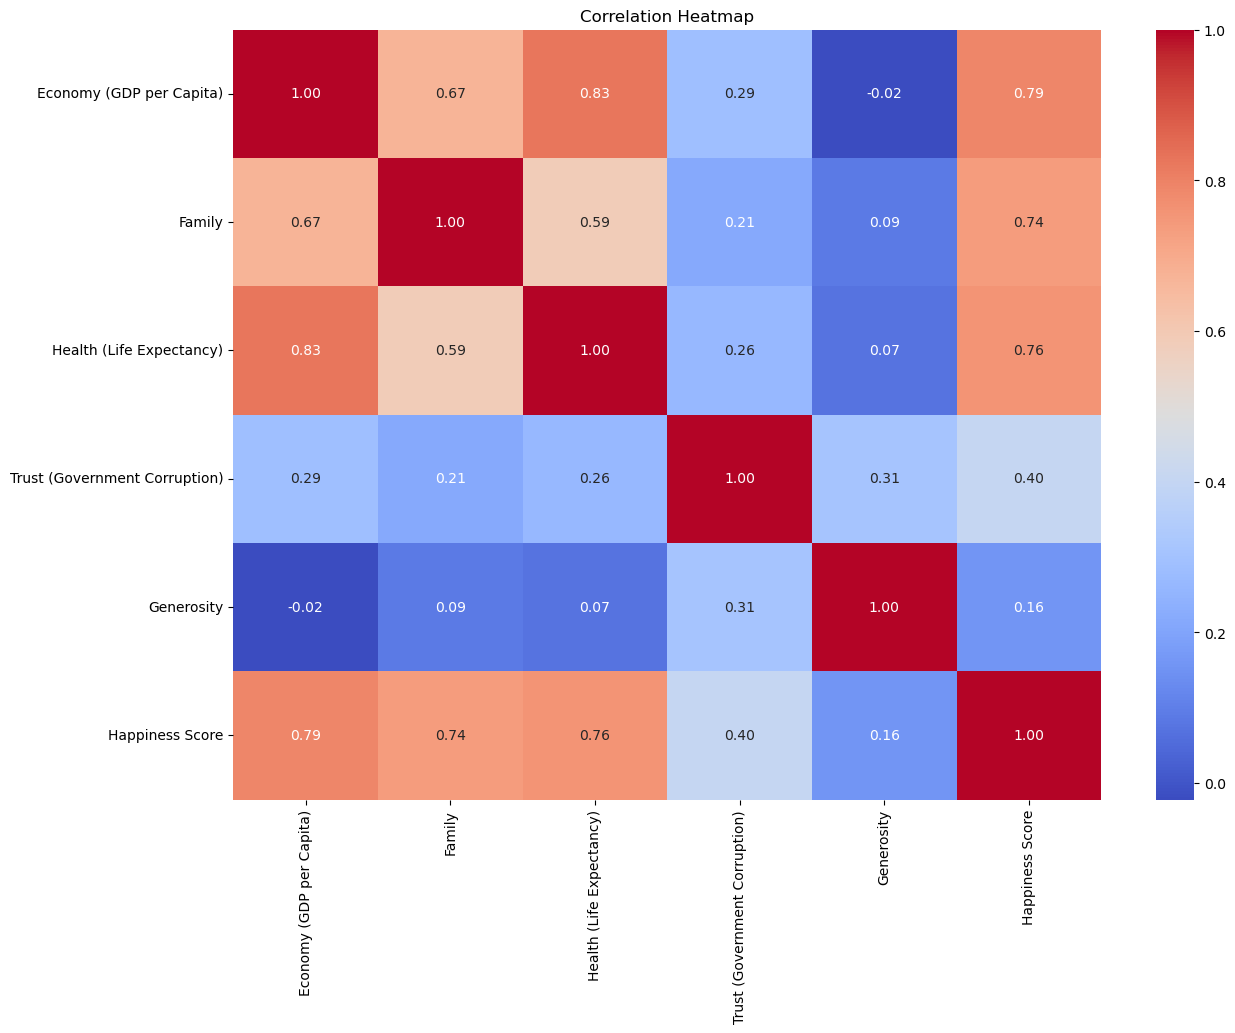

In [63]:
# create heatmap from correlation matrix to know which feature effect of the SalePrive for the buliding.
correlation_matric=sub_df.corr(numeric_only=True)
fig2_1 = plt.figure(figsize=(14,10))
sns.heatmap(correlation_matric,annot=True,cmap="coolwarm",fmt=".2f" )
plt.title('Correlation Heatmap')# annot=true to add correlation values in the heatmap 

In [66]:
# reates a scatter plot named fig3 between Happiness Score and GDP per Capita attributes of a dataframe using Plotly. Use Region to color the data points on the scatter plot.
# Create DataFrame
df_sorted
# Create scatter plot
fig3 = px.scatter( df_sorted, x='Happiness Score', 
                  y='Economy (GDP per Capita)',
                  color='Region',
                  hover_name='Country',
                  title='Happiness Score vs GDP per Capita by Region',
                  labels={'Happiness Score': 'Happiness Score', 
                          'Economy (GDP per Capita)': 'GDP per Capita'} ) 
# Show the plot 
fig3.show()

In [68]:


# Create pie chart
fig4 = px.pie( region_happiness,
              values='Happiness Score',
              names='Region',
              title='Happiness Score by Region',
              color_discrete_sequence=px.colors.sequential.RdBu ) 
# Show the plot
fig4.show()

In [70]:
# reates a map named fig5 to display GDP per capita of countries and include Healthy Life Expectancy to be shown as a tooltip.

# Create the map
fig5 = px.choropleth( df_sorted, 
                     locations="Country", 
                     locationmode='country names',
                     color="Economy (GDP per Capita)",
                     hover_name="Country",
                     hover_data={"Economy (GDP per Capita)": True,
                                 "Health (Life Expectancy)": True}, 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     labels={'Economy (GDP per Capita)': 'GDP per Capita (USD)',
                             'Health (Life Expectancy)': 'Healthy Life Expectancy'} )
# Update layout for better presentation 

fig5.update_layout( title='GDP per Capita and Healthy Life Expectancy by Country',
                   geo=dict(showframe=False, 
                            showcoastlines=False,
                            projection_type='equirectangular') ) 
# Show the plot

fig5.show()

In [93]:


# Write Python code to write any four of the Plotly figures (fig1, fig2, fig3, fig4, fig5) to a single HTML file 
# named “dashboard.html”?

import plotly.io as pio

# Assume fig1, fig2, fig3, fig4 are already created

# List of figures to be included in the HTML file
figures = [fig1,fig2, fig3, fig4, fig5]  # Replace with the desired figures

# Initialize HTML content
html_content = '<html><head><title>Dashboard</title></head><body>'

# Append HTML content of each figure
for fig in figures:
    html_content += pio.to_html(fig, include_plotlyjs='cdn', full_html=False)

# Close HTML tags
html_content += '</body></html>'

# Write HTML content to file
with open("dashboard.html", "w") as f:
    f.write(html_content)

# Automatically open the file in the default web browser
import webbrowser
webbrowser.open("dashboard.html")


True

### ### World Happiness Report Dashboard Narrative

Welcome to the World Happiness Report Dashboard. This comprehensive dashboard provides a detailed analysis of various factors influencing happiness across the globe, presented through four insightful visualizations:

#### 1. Correlation Heatmap
The first visualization is a **heatmap** that illustrates the correlation between key attributes such as GDP per Capita, Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Happiness Score. This heatmap helps identify the strength and direction of relationships between these factors. For instance, a strong positive correlation between GDP per Capita and Happiness Score suggests that higher economic prosperity is closely associated with greater happiness levels. Similarly, observing correlations with Health (Life Expectancy) can reveal how public health contributes to overall well-being.

#### 2. Scatter Plot: GDP per Capita vs. Happiness Score
Next, we have a **scatter plot** that examines the effect of GDP per Capita on Happiness Score across various regions. Each point on the scatter plot represents a country, color-coded by its region. This visualization allows us to explore regional disparities and observe how economic wealth correlates with happiness. Notably, countries with higher GDP per Capita often tend to report higher Happiness Scores, underscoring the role of economic factors in influencing happiness. Additionally, this plot can highlight outliers where high GDP does not necessarily translate to high happiness, prompting further investigation into other contributing factors.

#### 3. Pie Chart: Happiness Score by Region
Our third visualization is a **pie chart** that presents the average Happiness Score by region. This chart provides a clear and concise summary of how happiness levels vary across different parts of the world. By examining the size of each slice, we can understand which regions are generally happier and which may be facing challenges. This visual representation facilitates a comparative analysis of regional happiness, offering insights into geographic and cultural influences on well-being.

#### 4. Map: GDP per Capita and Healthy Life Expectancy
Lastly, we have an interactive **map** that displays the GDP per Capita of countries, with Healthy Life Expectancy included as a tooltip. This map provides a geographic perspective on economic prosperity and public health. By hovering over each country, viewers can access detailed information on both GDP per Capita and Healthy Life Expectancy, making it easier to identify patterns and disparities. This visualization is particularly useful for policymakers and researchers looking to understand the global distribution of wealth and health, and how these factors interplay to affect overall happiness.

### Conclusion
The World Happiness Report Dashboard offers a multifaceted view of the factors influencing happiness across the globe. By leveraging these visualizations, we can gain valuable insights into the complex relationships between economic, social, and health-related attributes. These insights can inform policies and initiatives aimed at enhancing well-being worldwide. We invite you to explore each visualization and uncover the stories they tell about happiness in different regions of the world.


<Axes: >

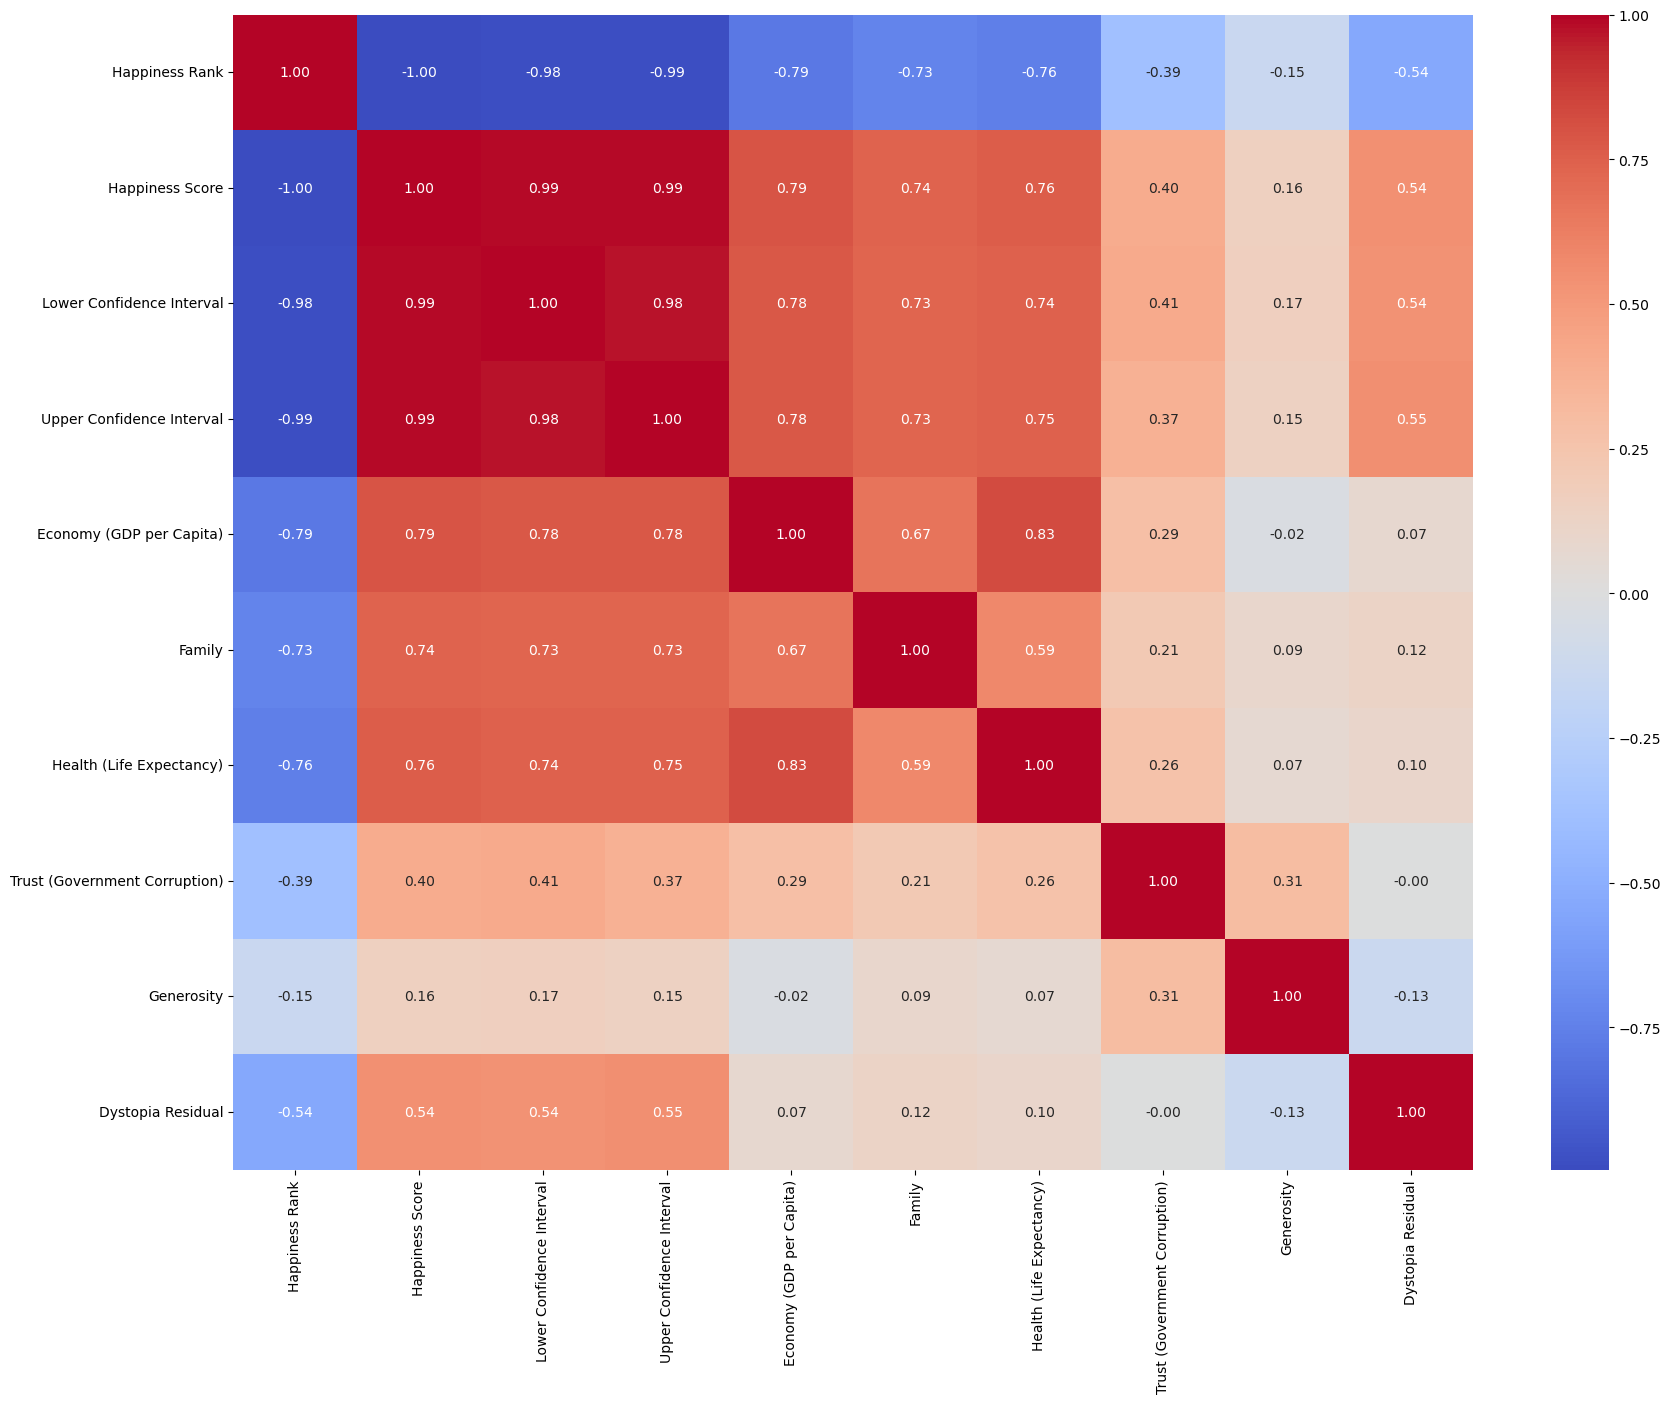

In [34]:
# create heatmap from correlation matrix to know which feature effect of the SalePrive for the buliding.
correlation_matric=df.corr(numeric_only=True)
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matric,annot=True,cmap="coolwarm",fmt=".2f" ) # annot=true to add correlation values in the heatmap 

In [36]:
# Create a pie chart to present Happiness Score by region.
# to craete Pie chart need to group the data region first .
region_happiness = df.groupby('Region')['Happiness Score'].mean().reset_index()
region_happiness

,Region,Happiness Score
0,Australia and New Zealand,7.323500
1,Central and Eastern Europe,5.370690
2,Eastern Asia,5.624167
3,Latin America and Caribbean,6.101750
4,Middle East and Northern Africa,5.386053
5,North America,7.254000
6,Southeastern Asia,5.338889
7,Southern Asia,4.563286
8,Sub-Saharan Africa,4.136421
9,Western Europe,6.685667


In [46]:
Country_happiness_Map = df.groupby('Country')['Happiness Score','Economy (GDP per Capita)'].sum().reset_index()
Country_happiness_Map

C:\Users\Mohamed Asharf\AppData\Local\Temp\ipykernel_6960\2879442572.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Happiness Score,Economy (GDP per Capita)
0,Australia,7.3,69577
1,Denmark,7.6,74005
2,Ireland,7.5,126905
3,Luxembourg,7.8,142214
4,Netherlands,7.4,67494
5,Norway,7.7,114899
6,Qatar,6.2,114648
7,Singapore,7.6,127565
8,Switzerland,7.5,83598
9,United States,7.2,76399


In [53]:
# Export DataFrame to CSV
df_sorted.to_csv("D:\ganeral_courses\Generative AI for Data analytics\mode_2\Happiness_score.csv",index=False)